# Calculus Programming Challenges

## #2: Implement the Gradient Descent

The gradient descent method is used to find the minimum value of a function. Similar to the gradient ascent method, the gradient descent method is an iterative method: we start with an initial value of the variable and gradually get closer to the variable value that corresponds to the minimum value of the function. The step that gets us closer is the equation

$$x_{new} = x_{old} - \lambda \frac{df}{dx}$$

where $\lambda$ is the step size and

$$\frac{df}{dx}$$

is the result of differentiating the function. Thus, the only difference from the gradient ascent method is how we obtain the value of `x_new` from `x_old`. 

Your challenge is to implement a generic program using the gradient descent algorithm to find the minimum value of a single-variable function specified as input by the user. The program should also create a graph of the function and show all the intermediate values it found before finding the minimum.

In [1]:
# Import modules
import numpy as np
from sympy import Symbol, Derivative, sympify, SympifyError, solve
import matplotlib.pyplot as plt

# Configure Jupyter plotting
%matplotlib inline

Enter a function in one variable: x**2 + 3*x
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.5
x: -1.49500167298399
Minimum value: -2.24997501672704


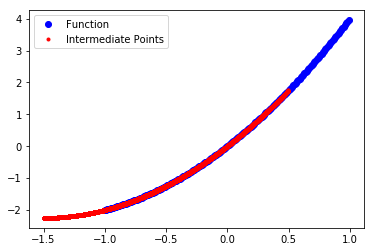

In [2]:
'''
Use gradient descent to find the maximum value of a single-variable function
'''
def grad_descent(x0, f1x, x):
    # Is there a solution for f1x?
    if not solve(f1x):
        print("Cannot continue, solution for {} = 0 does not exist".format(f1x))
        return None
    
    # Define threshold, step size
    epsilon =  1e-6
    step_size = 1e-4
    
    # Iterate through algorithm until difference within threshold
    x_old = x0
    x_new = x_old - step_size*f1x.subs({ x: x_old}).evalf()
    x_traversed = []
    while abs(x_old - x_new) > epsilon:
        x_traversed.append(x_new)
        x_old = x_new
        x_new = x_old - step_size*f1x.subs({ x: x_old }).evalf()
    return x_new, x_traversed

def create_plot(x_traversed, f, var):
    x_val = np.arange(-1, 1, 0.01)
    f_val = [f.subs({ var: x }) for x in x_val]
    plt.plot(x_val, f_val, 'bo')
    
    f_traversed = [f.subs({ var: x }) for x in x_traversed]
    plt.plot(x_traversed, f_traversed, 'r.')
    
    plt.legend(['Function', 'Intermediate Points'], loc = 'best')
    plt.show()
    

if __name__ == '__main__':
    # Get inputs from user
    f = input('Enter a function in one variable: ')
    var = Symbol(input('Enter the variable to differentiate with respect to: '))
    var0 = float(input('Enter the initial value of the variable: '))
    
    # Create symbolized function
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        # Find minimum value (if possible)
        d = Derivative(f, var).doit()
        var_min, x_traversed = grad_descent(var0, d, var)
        if var_min:
            print('{}: {}'.format(var.name, var_min))
            print('Minimum value: {}'.format(f.subs({ var: var_min })))
            
        # Create plot of function and intermediate values
        create_plot(x_traversed, f, var)